In [259]:
import numpy as np
import pandas
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

data = pandas.read_csv('datasets/spiralsdataset.csv', header=None, names=['x1','x2','y'])
print(data.head(5))

# Split into numpy arrays with features and labels
X = data[['x1', 'x2']].to_numpy()
y = data[['y']].to_numpy().flatten()
print(X.shape)
print(y.shape)

def plot_dataset(X, y, axes):
    """Plot a dataset with two features and binary classes"""
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

axes = [-7, 7, -7, 7]
# plot_dataset(X, y, axes)


        x1       x2  y
0  6.50000  0.00000  0
1 -6.50000 -0.00000  1
2  6.31380  1.25590  0
3 -6.31380 -1.25590  1
4  5.88973  2.43961  0
(194, 2)
(194,)


Now we will convert the data into torch values that pyTorch can use in a useful way and then we can create a feed forward NN to learn on the data, the first step being defining the FFNN

In [260]:

# Define the FFNN architecture

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        return x

We now can define input and output size, aswell as hidden size learning rate and num_epochs, experimenting with these and recording results should help us determine a good set of values for each of these.

In [261]:
#Define Input and Output layer Size
input_layers = 2
output_layers = 2
#The Hidden layer is meant to be 2/3 of the input layer + the output layer.
#Since it is binary classification the output layer can either be 1 or 2 however we will use 2.
hidden_layers = 6
learning_rate = 0.1
epoch_count = 100

network = FFNN(input_layers,hidden_layers,output_layers)


Now that the network is defined and we have the initial values for learning rate and epoch count, we will make the initial attempt at classification

In [262]:
inputX = X[:,:2] 
# print(inputX)
inputs = torch.from_numpy(X).float()

labels = torch.from_numpy(y).long()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)

# Train the FFNN on the two-spiral task dataset
for epoch in range(epoch_count):
    # Forward pass
    outputs = network(inputs) 
    loss = criterion(outputs, labels)
    optimizer.zero_grad()

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Print training progress
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epoch_count, loss.item()))


Epoch [10/100], Loss: 0.6920
Epoch [20/100], Loss: 0.6909
Epoch [30/100], Loss: 0.6904
Epoch [40/100], Loss: 0.6900
Epoch [50/100], Loss: 0.6897
Epoch [60/100], Loss: 0.6894
Epoch [70/100], Loss: 0.6892
Epoch [80/100], Loss: 0.6890
Epoch [90/100], Loss: 0.6889
Epoch [100/100], Loss: 0.6887


Now that it has been trained on the data set we can use a scatter plot to visualize the results.

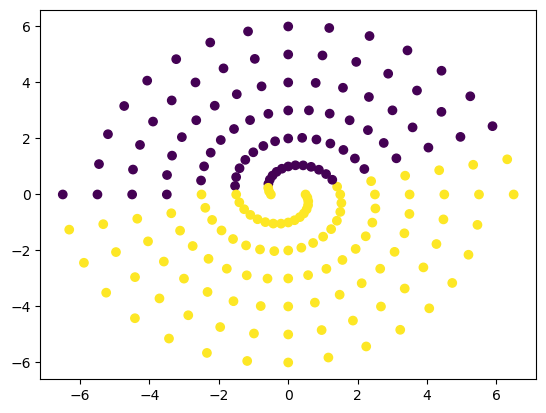

In [263]:
# Get predicted class labels for each input point
_, predicted = torch.max(outputs.data, 1)

# Convert to numpy array for plotting
predicted = predicted.numpy()

# Plot input data with color-coded predictions
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=predicted)
plt.show()
